In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the raw dataframe

In [ ]:
cols = ['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes',
        'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes',
        'resp_pkts', 'resp_ip_bytes', 'tunnel_parents', 'label', 'detailed-label']
df = pd.read_csv('malware_data.csv', delimiter='|')
df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524,65.127.233.163,23,tcp,-,2.999051,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305,63.150.16.171,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101,111.40.23.49,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905,131.174.215.147,23,tcp,-,2.998796,0,...,-,0,S,3,180,0,0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301,91.42.47.63,23,tcp,-,-,-,...,-,0,S,1,60,0,0,-,Malicious,PartOfAHorizontalPortScan


# Remove features with low predictive power and frequent unknown columns


In [ ]:
cols_to_drop = ['ts','uid','id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'local_orig', 'local_resp', 'history', 'tunnel_parents', 'detailed-label']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,-,2.999051,0,0,S0,0,3,180,0,0,Malicious
1,tcp,-,-,-,-,S0,0,1,60,0,0,Malicious
2,tcp,-,-,-,-,S0,0,1,60,0,0,Malicious
3,tcp,-,2.998796,0,0,S0,0,3,180,0,0,Malicious
4,tcp,-,-,-,-,S0,0,1,60,0,0,Malicious


In [ ]:
df.replace('-', np.nan, inplace=True)
df.head()

<ipython-input-79-26acf1afe06e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,NaN,2.999051,0,0,S0,0,3,180,0,0,Malicious
1,tcp,NaN,NaN,NaN,NaN,S0,0,1,60,0,0,Malicious
2,tcp,NaN,NaN,NaN,NaN,S0,0,1,60,0,0,Malicious
3,tcp,NaN,2.998796,0,0,S0,0,3,180,0,0,Malicious
4,tcp,NaN,NaN,NaN,NaN,S0,0,1,60,0,0,Malicious


In [ ]:
null_values = df.isnull().sum()

null_percentage = (null_values / len(df)) * 100

columns_with_null = null_percentage[null_percentage > 0]

print("Columns with Null Values (Percentage):")
print(columns_with_null)
print('\n')
print(null_values)

Columns with Null Values (Percentage):
service       100.000000
duration       78.095619
orig_bytes     78.095619
resp_bytes     78.095619
dtype: float64


proto               0
service          9998
duration         7808
orig_bytes       7808
resp_bytes       7808
conn_state          0
missed_bytes        0
orig_pkts           0
orig_ip_bytes       0
resp_pkts           0
resp_ip_bytes       0
label               0
dtype: int64


In [ ]:
cols_to_drop = ['service', 'duration', 'orig_bytes', 'resp_bytes']
df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,proto,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,S0,0,3,180,0,0,Malicious
1,tcp,S0,0,1,60,0,0,Malicious
2,tcp,S0,0,1,60,0,0,Malicious
3,tcp,S0,0,3,180,0,0,Malicious
4,tcp,S0,0,1,60,0,0,Malicious


# Convert label to numerical value

In [ ]:
df['label'] = (df['label']=='Malicious').astype(int)

In [ ]:
df.head()

,proto,conn_state,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,S0,0,3,180,0,0,1
1,tcp,S0,0,1,60,0,0,1
2,tcp,S0,0,1,60,0,0,1
3,tcp,S0,0,3,180,0,0,1
4,tcp,S0,0,1,60,0,0,1


# Apply OHE to the categorical values for proto and conn_state

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe_proto = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_proto = ohe_proto.fit_transform(df[['proto']])

ohe_conn_state = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_conn = ohe_conn_state.fit_transform(df[['conn_state']])
proto_feature_names = ohe_proto.get_feature_names_out(['proto'])
conn_feature_names = ohe_conn_state.get_feature_names_out(['conn_state'])

proto_df = pd.DataFrame(encoded_proto, columns=proto_feature_names, index=df.index)
conn_df = pd.DataFrame(encoded_conn, columns=conn_feature_names, index=df.index)
df = pd.concat([df.drop(['proto', 'conn_state'], axis=1), proto_df, conn_df], axis=1)


In [ ]:
df.head()

,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,proto_tcp,proto_udp,conn_state_OTH,conn_state_REJ,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S2,conn_state_SF
0,0,3,180,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,60,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,60,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,3,180,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1,60,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Display the relationship between probability density against the range of x value based on feature

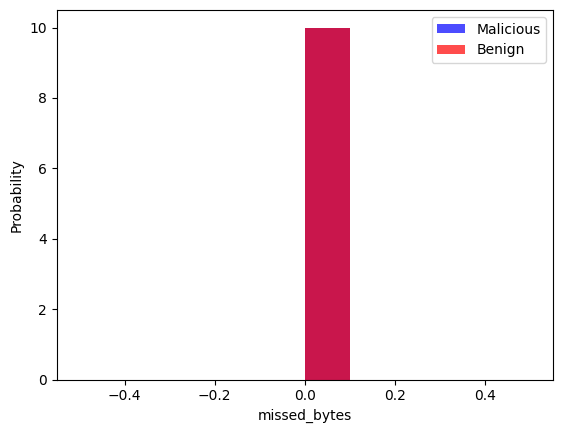

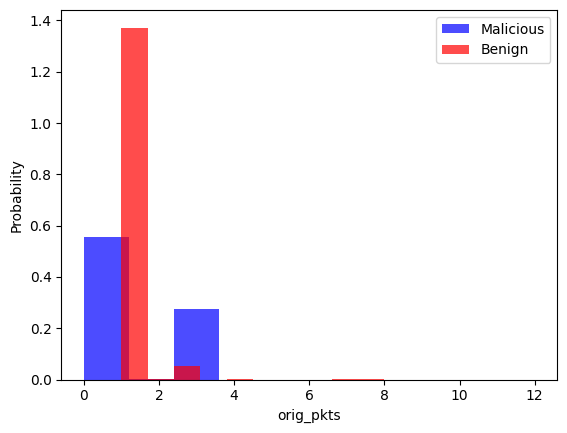

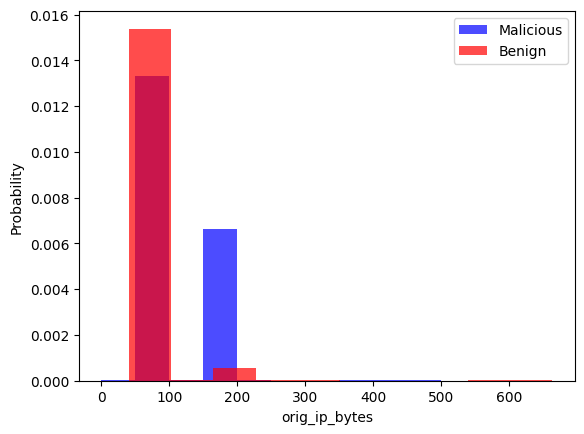

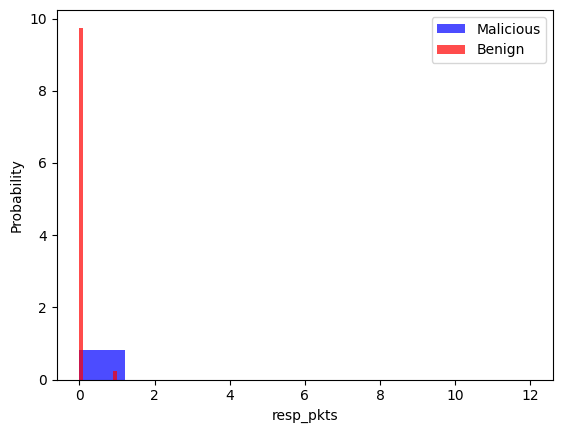

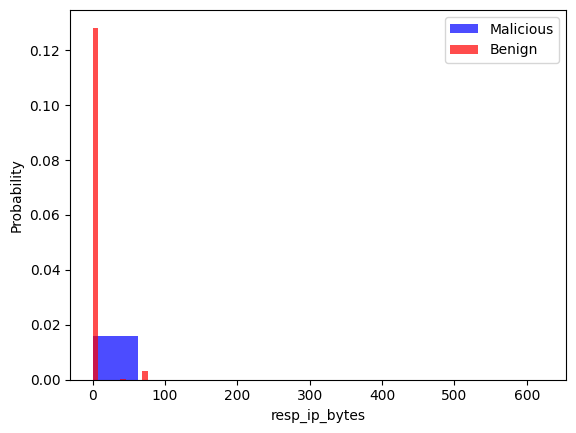

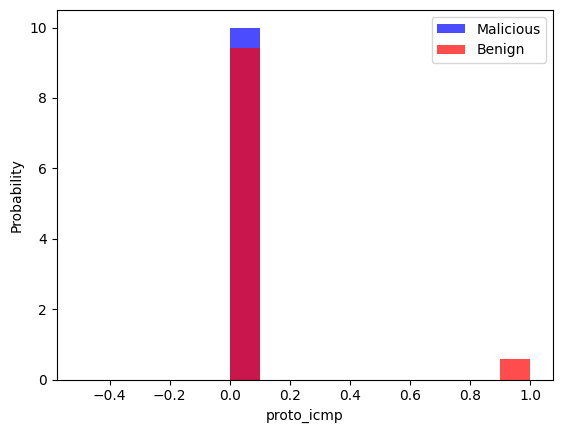

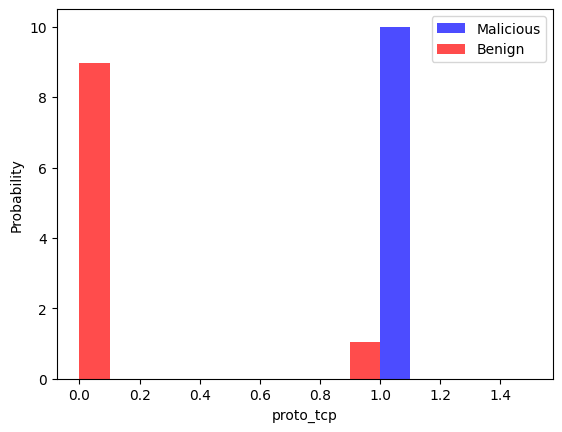

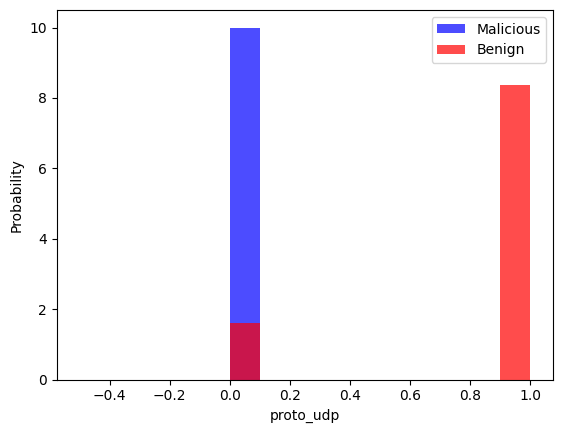

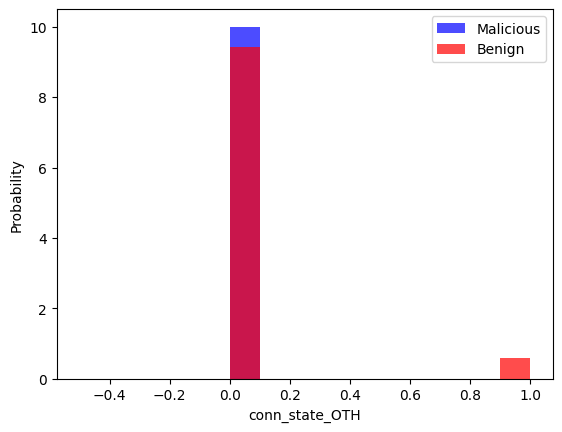

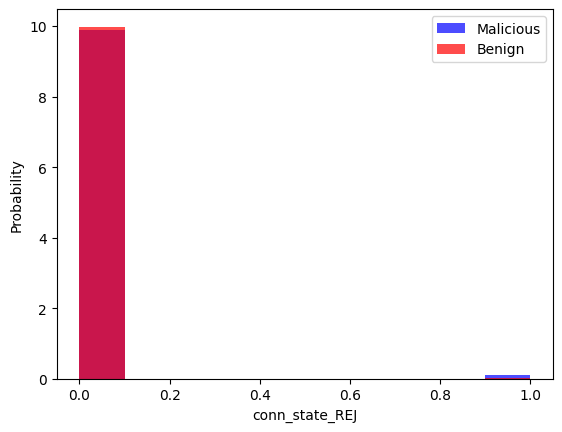

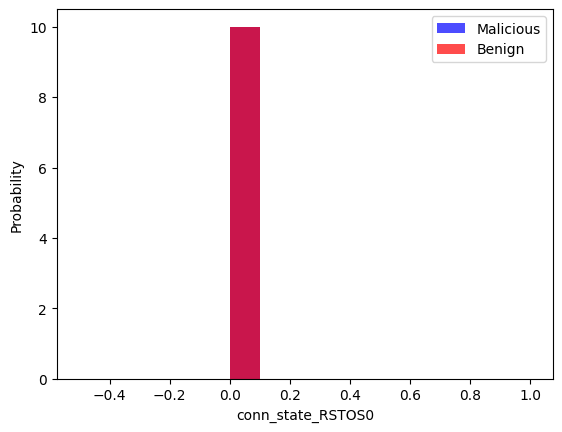

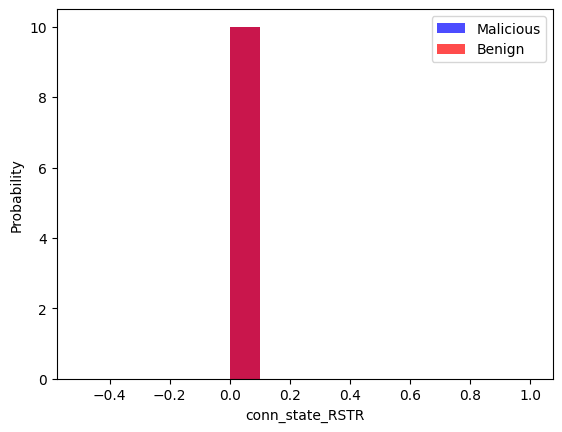

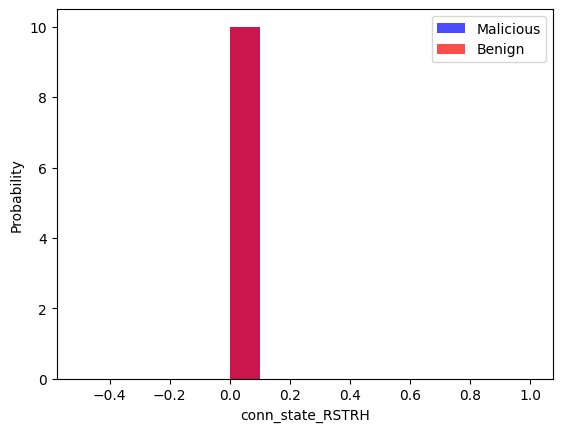

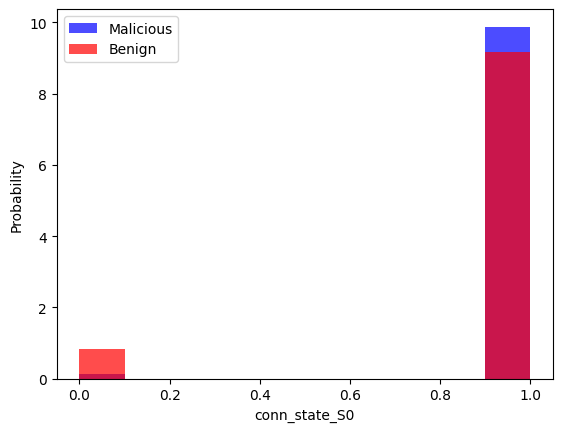

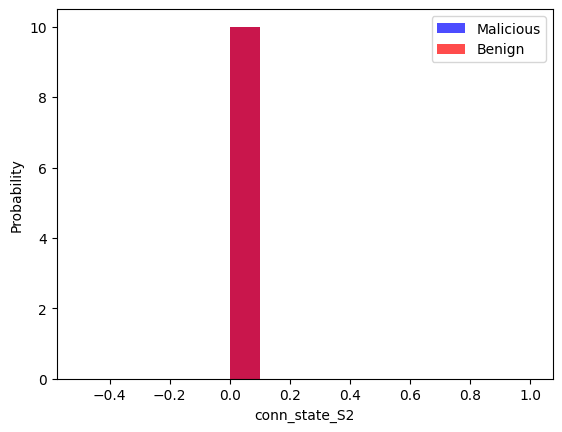

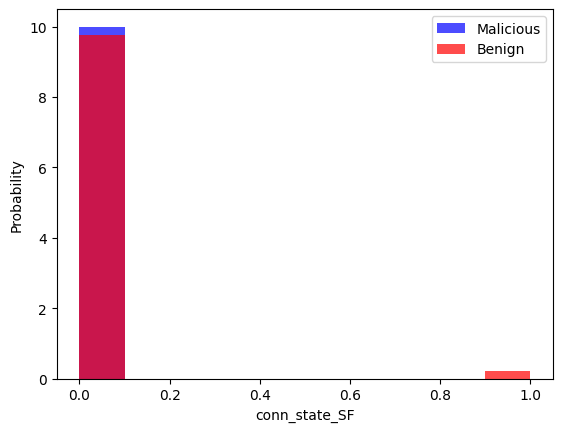

In [100]:
copy_df = df.copy()
copy_df.drop('label', axis=1, inplace=True)

for col in copy_df.columns:
  plt.hist(df[df['label'] == 1][col], alpha=0.7, label='Malicious', color='blue', density=True)
  plt.hist(df[df['label'] == 0][col], alpha=0.7, label='Benign', color='red', density=True)
  plt.legend()
  plt.ylabel('Probability')
  plt.xlabel(col)
  plt.show()

# Process the data

In [ ]:
train, test, valid = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample=False):
  y = dataframe['label'].values
  X = dataframe.drop('label', axis=1).values

  scaler = StandardScaler()
  X = pd.DataFrame(scaler.fit_transform(X))

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


# Random Forest Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       898
           1       0.91      1.00      0.95      1102

    accuracy                           0.95      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       898
           1       0.91      1.00      0.95      1102

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



# SVM

In [103]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       898
           1       0.91      1.00      0.95      1102

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



# Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       898
           1       0.91      1.00      0.95      1102

    accuracy                           0.95      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000



# Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       898
           1       0.91      1.00      0.95      1102

    accuracy                           0.95      2000
   macro avg       0.96      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000

